# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

# Challenge 0 - Import a MySQL table into python:

In this lab, we will twist things up a little. Do you remember your good old friend SQL?
Well, it's time to bring him back and use it in our lab pipeline.

1º- Open the wholesale_customers_data.sql file in MySQL Workbench and run the script into a desired schema.

2º- Create a connection using sqlalchemy from python to mysql and load the table into a variable called *customers*

In [51]:
#Create a connection with create_engine to MySQL Workbench:


from sqlalchemy import create_engine
import pyodbc

# Connection string using Windows Authentication

conn_str = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=DIANA_LAP;DATABASE=wholesale_customers_data;Trusted_Connection=yes;'
connection = pyodbc.connect(conn_str)
cursor = connection.cursor()

#SQL query
cursor.execute("SELECT * FROM [wholesale_customers_data].[dbo].[wholesale_customers]")
rows = cursor.fetchall()
for row in rows:
    print(row)

# Don't forget to close the cursor and connection when done
cursor.close()
connection.close()



(2, 3, 12669, 9656, 7561, 214, 2674, 1338)
(2, 3, 7057, 9810, 9568, 1762, 3293, 1776)
(2, 3, 6353, 8808, 7684, 2405, 3516, 7844)
(1, 3, 13265, 1196, 4221, 6404, 507, 1788)
(2, 3, 22615, 5410, 7198, 3915, 1777, 5185)
(2, 3, 9413, 8259, 5126, 666, 1795, 1451)
(2, 3, 12126, 3199, 6975, 480, 3140, 545)
(2, 3, 7579, 4956, 9426, 1669, 3321, 2566)
(1, 3, 5963, 3648, 6192, 425, 1716, 750)
(2, 3, 6006, 11093, 18881, 1159, 7425, 2098)
(2, 3, 3366, 5403, 12974, 4400, 5977, 1744)
(2, 3, 13146, 1124, 4523, 1420, 549, 497)
(2, 3, 31714, 12319, 11757, 287, 3881, 2931)
(2, 3, 21217, 6208, 14982, 3095, 6707, 602)
(2, 3, 24653, 9465, 12091, 294, 5058, 2168)
(1, 3, 10253, 1114, 3821, 397, 964, 412)
(2, 3, 1020, 8816, 12121, 134, 4508, 1080)
(1, 3, 5876, 6157, 2933, 839, 370, 4478)
(2, 3, 18601, 6327, 10099, 2205, 2767, 3181)
(1, 3, 7780, 2495, 9464, 669, 2518, 501)
(2, 3, 17546, 4519, 4602, 1066, 2259, 2124)
(1, 3, 5567, 871, 2010, 3383, 375, 569)
(1, 3, 31276, 1917, 4469, 9408, 2381, 4334)
(2, 3, 26373,

In [98]:
# Load the data into a pandas DataFrame
# Setup the connection string for SQLAlchemy engine


conn_str = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=DIANA_LAP;DATABASE=apple;Trusted_Connection=yes;'

connection = pyodbc.connect(conn_str)


# Define the SQL query
query = "SELECT * FROM [wholesale_customers_data].[dbo].[wholesale_customers]"

# Use the engine to execute the query and load the results directly into a DataFrame
wholesale = pd.read_sql_query(query, connection)


connection.close()
# Display the first few rows of the DataFrame
print(wholesale.head())



   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


C:\Users\diana\AppData\Local\Temp\ipykernel_18732\3666080336.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  wholesale = pd.read_sql_query(query, connection)


In [99]:
wholesale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# Challenge 1 - Describe the Dataset

Your already loaded dataset contains information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

In case of curiosity, the origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [ ]:
# Understanding Each Column
# Channel: The type of channel through which the customer buys. It could be through retail or wholesale channels.
# Region: The customer's region.
# Fresh: fresh products.
# Milk:  milk products.
# Grocery: grocery products.
# Frozen: frozen products.
# Detergents_Paper:detergents and paper products.
# Delicassen: Annual spending on delicatessen products.

In [119]:
## Any categorical data to convert?
wholesale.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [160]:
# Your code here:
# Any missing data to remove?
# Check for missing values
missing_data = wholesale.isnull().sum()
missing_data 



Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [198]:
# Descriptive statistics
descriptive_stats = wholesale.describe()
descriptive_stats

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [255]:
# Check for column collinearity
correlation_matrix = wholesale.corr()
correlation_matrix


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


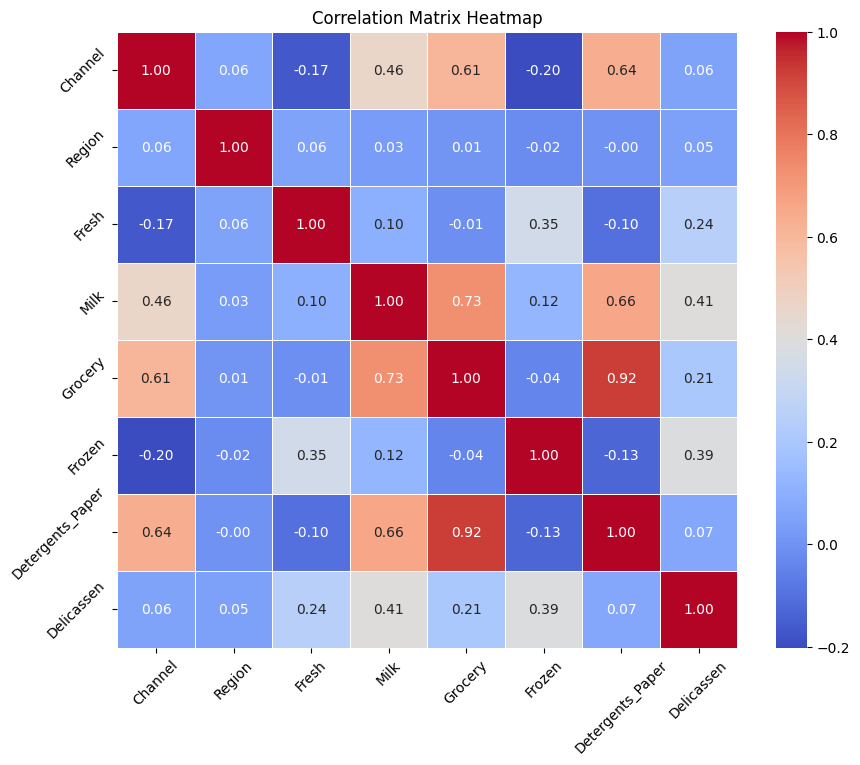

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'wholesale' is your DataFrame name
correlation_matrix = wholesale.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add titles and labels for clarity
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [293]:
# Your code here:

Q1 = wholesale.quantile(0.25)
Q3 = wholesale.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using the IQR rule
outliers = ((wholesale < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df_outliers = wholesale[outliers]
print("Outliers detected:\n", df_outliers)


Outliers detected:
      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
2          2       3   6353   8808     7684    2405              3516   
4          2       3  22615   5410     7198    3915              1777   
17         1       3   5876   6157     2933     839               370   
22         1       3  31276   1917     4469    9408              2381   
23         2       3  26373  36423    22019    5154              4337   
..       ...     ...    ...    ...      ...     ...               ...   
427        1       3  31012  16687     5429   15082               439   
431        1       3   8533   5506     5160   13486              1377   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   

     Delicassen  
2          7844  
4          5185  
17         4478  
22         4334  
23        165

c:\Users\diana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\diana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\diana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\diana\AppData\Local\Programs\Python\Python312

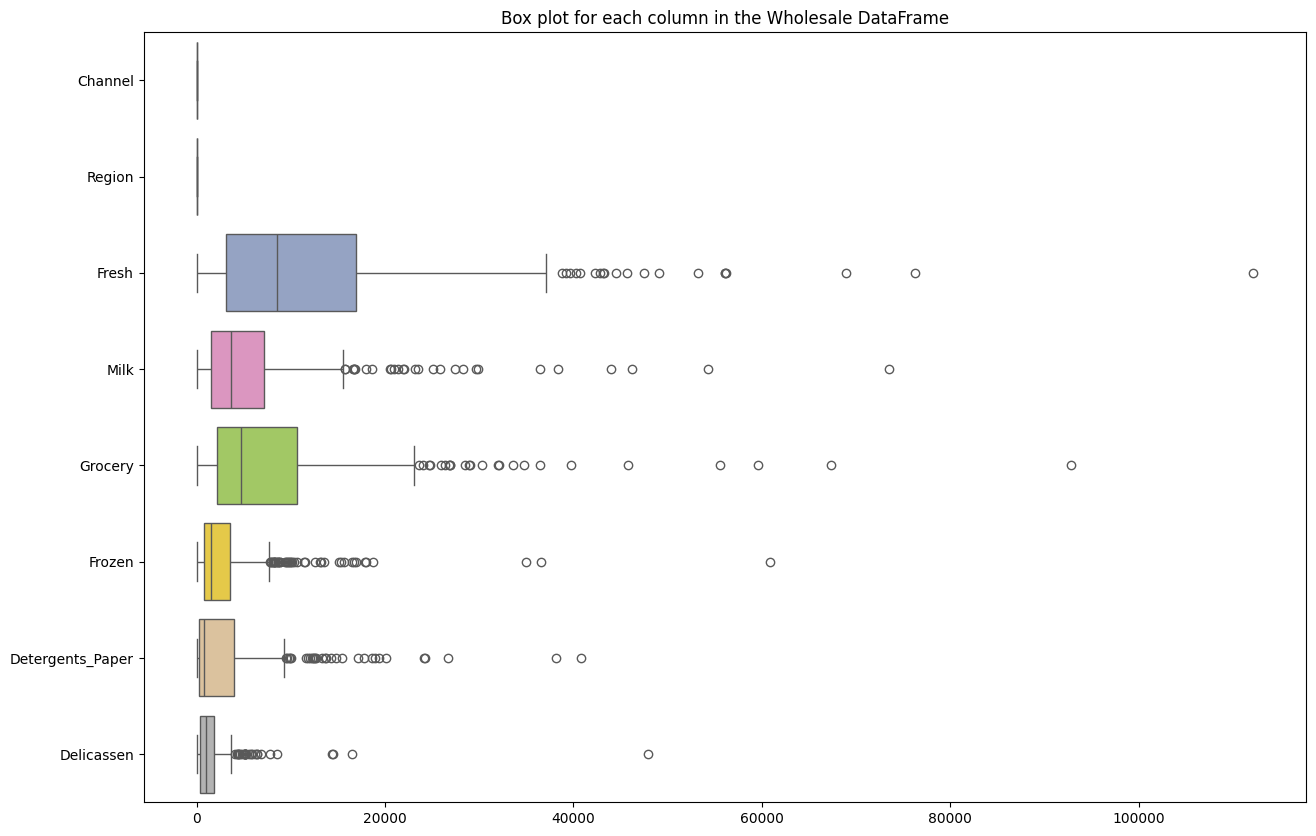

In [311]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=wholesale, orient="h", palette="Set2")
plt.title("Box plot for each column in the Wholesale DataFrame")
plt.show()

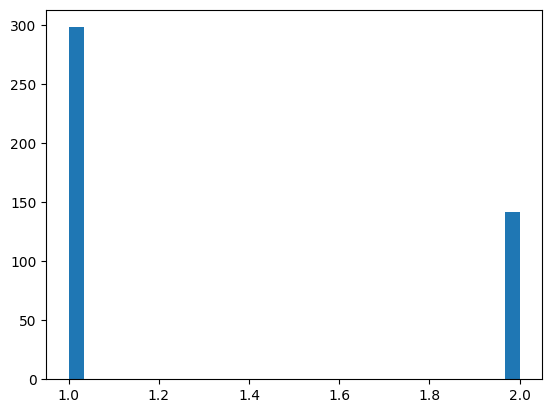

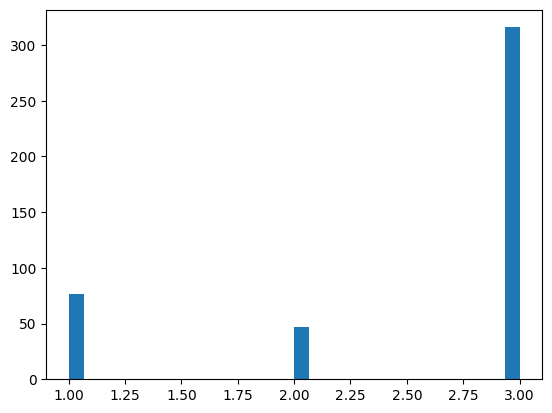

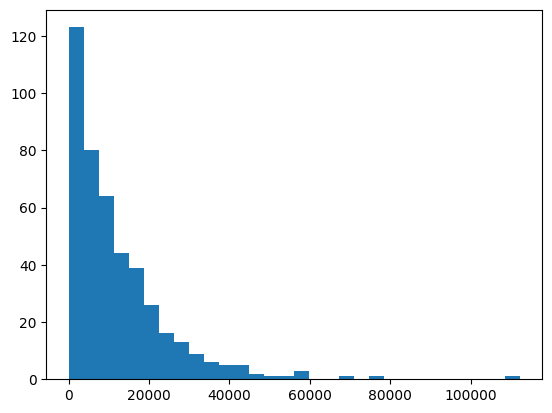

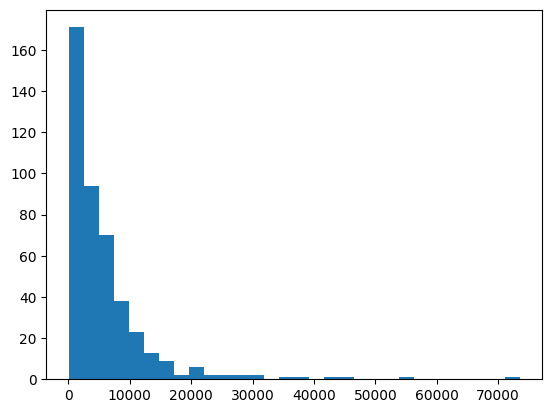

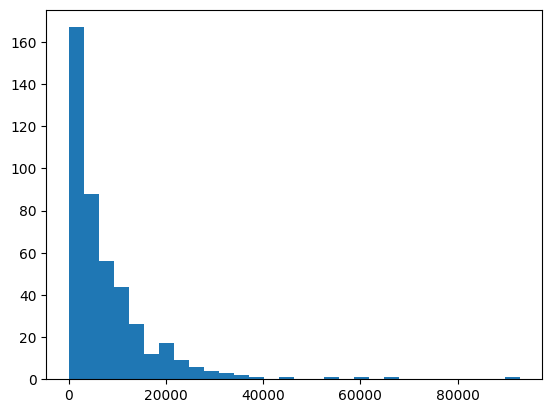

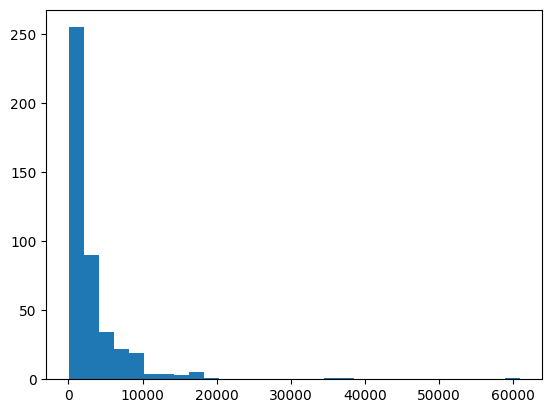

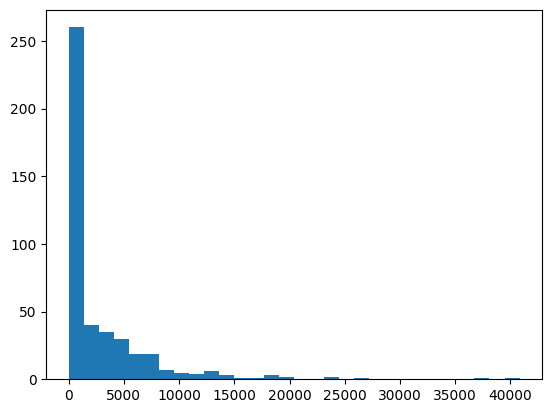

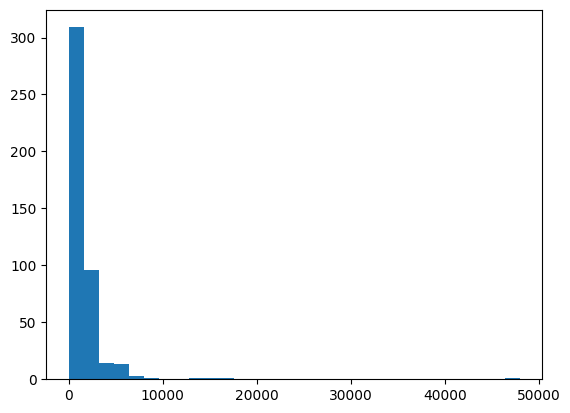

In [329]:
# Your observations here

# Descriptive statistics - any outliers to remove?
# Column-wise data distribution - is the distribution skewed?
for column in wholesale.columns:
    plt.figure()
    plt.hist(wholesale[column], bins= 30)


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [330]:
# Your code here

In [331]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [347]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

# Fit and transform the data
scaler = StandardScaler()
wholesale_scaled = scaler.fit_transform(wholesale)

# Convert the scaled data back to a DataFrame
customers_scale = pd.DataFrame(wholesale_scaled, columns=wholesale.columns)

# Display the first few rows of the scaled DataFrame to verify the transformation
print(customers_scale.head())



    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [361]:
# Your code here:
from sklearn.cluster import KMeans


# Initialize the K-Means model
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed

# Fit the model to the scaled data
kmeans.fit(customers_scale)

# Assign the labels to the original data
wholesale['labels'] = kmeans.labels_

# Display the first few rows of the dataframe to see the cluster labels
print(wholesale.head())






c:\Users\diana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  labels  
0        1338       1  
1        1776       1  
2        7844       1  
3        1788       3  
4        5185       1  


Count the values in `labels`.

In [374]:
# Your code here:
wholesale.labels.value_counts()

labels
3    207
1    126
2     91
4     10
0      6
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [386]:
# Your code here

from sklearn.cluster import DBSCAN

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.5)

# Fit the model to the scaled data
dbscan.fit(customers_scale)

# Assign the DBSCAN labels to the original data in a new column 'labels_DBSCAN'
wholesale['labels_DBSCAN'] = dbscan.labels_

# Display the first few rows of the dataframe to see the DBSCAN cluster labels
print(wholesale.head())



   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  labels  labels_DBSCAN  
0        1338       1             -1  
1        1776       1             -1  
2        7844       1             -1  
3        1788       3              1  
4        5185       1             -1  


Count the values in `labels_DBSCAN`.

In [397]:
# Your code here
labels_DBSCAN_counts = wholesale['labels_DBSCAN'].value_counts()

labels_DBSCAN_counts

labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

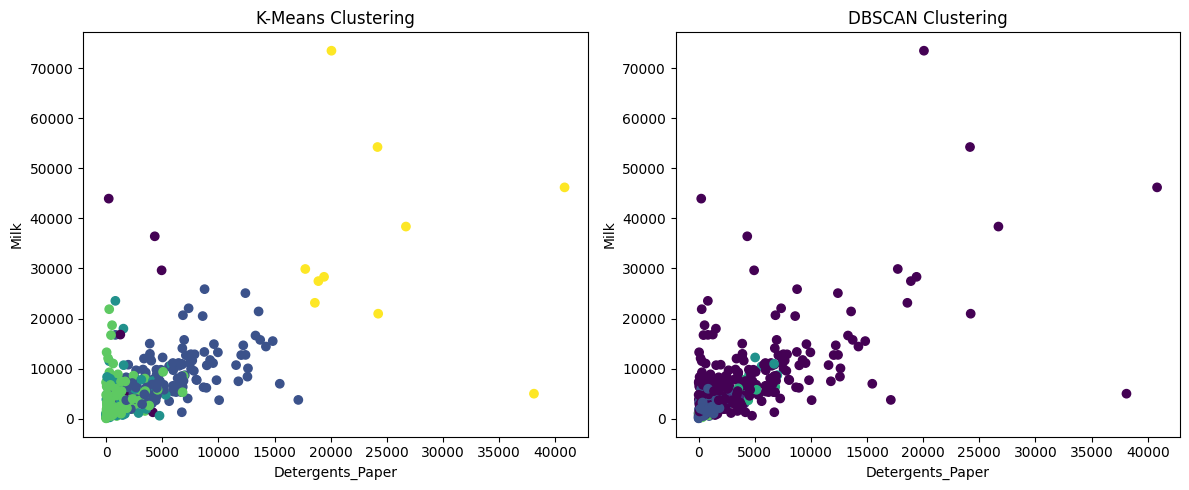

In [407]:
# Scatter plot for K-Means clustering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(wholesale['Detergents_Paper'], wholesale['Milk'], c=wholesale['labels'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')

# Scatter plot for DBSCAN clustering
plt.subplot(1, 2, 2)
plt.scatter(wholesale['Detergents_Paper'], wholesale['Milk'], c=wholesale['labels_DBSCAN'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')

plt.tight_layout()
plt.show()

## Visualize Grocery as X and Fresh as y by labels and labels_DBSCAN respectively 

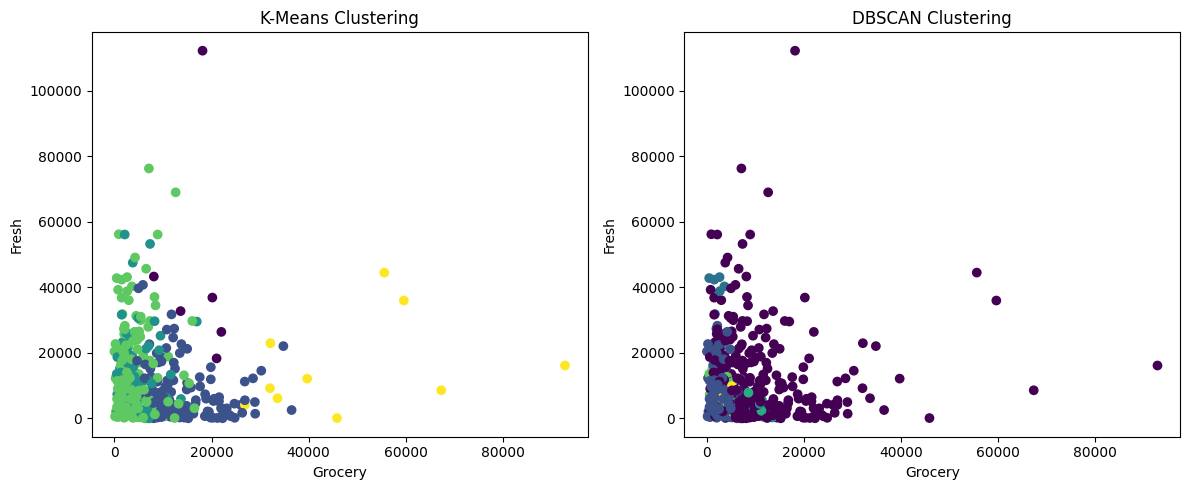

In [417]:
# Scatter plot for K-Means clustering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(wholesale['Grocery'], wholesale['Fresh'], c=wholesale['labels'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Grocery')
plt.ylabel('Fresh')

# Scatter plot for DBSCAN clustering
plt.subplot(1, 2, 2)
plt.scatter(wholesale['Grocery'], wholesale['Fresh'], c=wholesale['labels_DBSCAN'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Grocery')
plt.ylabel('Fresh')

plt.tight_layout()
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

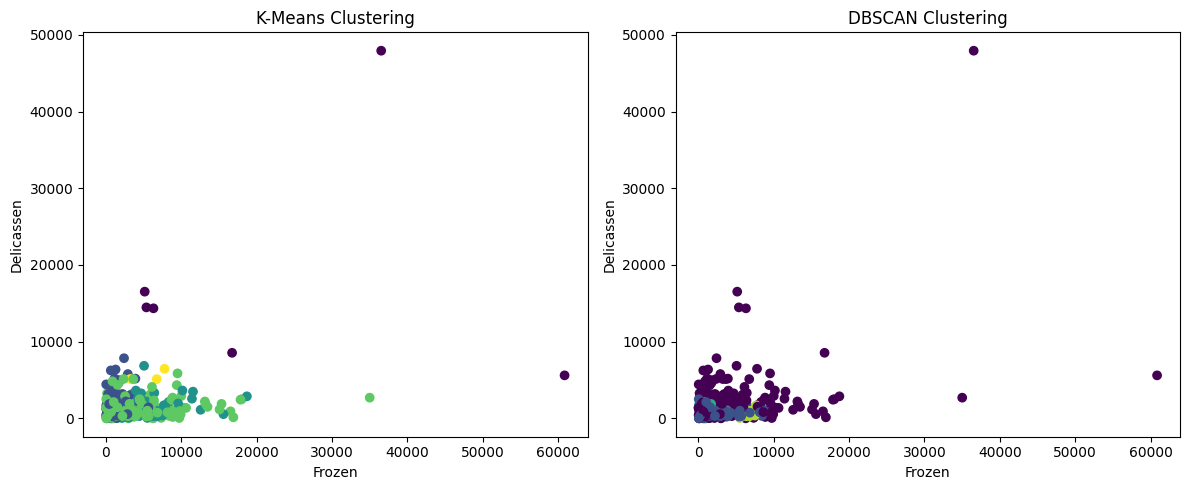

In [427]:
# Your code here:
# Scatter plot for K-Means clustering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(wholesale['Frozen'], wholesale['Delicassen'], c=wholesale['labels'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')

# Scatter plot for DBSCAN clustering
plt.subplot(1, 2, 2)
plt.scatter(wholesale['Frozen'], wholesale['Delicassen'], c=wholesale['labels_DBSCAN'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')

plt.tight_layout()
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [434]:
# Your code here:
# Group by 'labels' and compute the means for all columns
means_kmeans = wholesale.groupby('labels').mean()

# Group by 'labels_DBSCAN' and compute the means for all columns
means_dbscan = wholesale.groupby('labels_DBSCAN').mean()

print("Means for K-Means Clustering:")
print(means_kmeans)
print("\nMeans for DBSCAN Clustering:")
print(means_dbscan)

Means for K-Means Clustering:
         Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       1.166667  2.833333  44940.666667  22179.166667  17187.000000   
1       2.000000  2.674603   8130.031746   8874.071429  14139.150794   
2       1.054945  1.307692  12183.945055   3254.714286   4130.923077   
3       1.000000  3.000000  13129.057971   3168.526570   3635.864734   
4       2.000000  2.500000  15964.900000  34708.500000  48536.900000   

              Frozen  Detergents_Paper    Delicassen  labels_DBSCAN  
labels                                                               
0       21831.166667       2758.000000  17908.000000      -1.000000  
1        1339.476190       6104.936508   1542.706349      -0.523810  
2        3458.252747        860.263736   1149.934066       1.351648  
3        3413.729469        749.038647   1135.468599       0.328502  
4        3054.600000      24875.200000   2942

Which algorithm appears to perform better?

In [435]:
# Your observations here

# Based on the mean values of the clusters and the number of clusters detected, it appears that K-Means performs better in this scenario as it provides more evenly distributed clusters with clear separation.

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [436]:
# Your code here

In [437]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [438]:
# Your code here

In [439]:
# Your comment here